<a href="https://colab.research.google.com/github/AmanuelKBr/PROJECTS_1/blob/main/US_Credit_Data_Analysis_(ML_%2B_Tableau).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set_style('whitegrid')

In [15]:
df = pd.read_csv('/content/us_credit_dataset.csv')

In [19]:
df.head()

,Customer_ID,Age,Gender,State,Education_Level,Annual_Income,Credit_Limit,Avg_Monthly_Spend,Num_Late_Payments,Credit_Utilization_Rate,Employment_Type,Credit_Score
0,USCUST100000,59,Female,Illinois,Bachelor’s Degree,66596,16202,1512,2,1.12,Full-Time,400
1,USCUST100001,72,Female,California,Associate Degree,96799,19004,2109,1,1.33,Retired,397
2,USCUST100002,49,Male,Michigan,Master’s Degree,58504,20415,1133,1,0.67,Full-Time,558
3,USCUST100003,35,Female,Georgia,High School,43591,11057,1280,1,1.39,Part-Time,326
4,USCUST100004,63,Female,California,Master’s Degree,80477,24745,1883,3,0.91,Full-Time,446


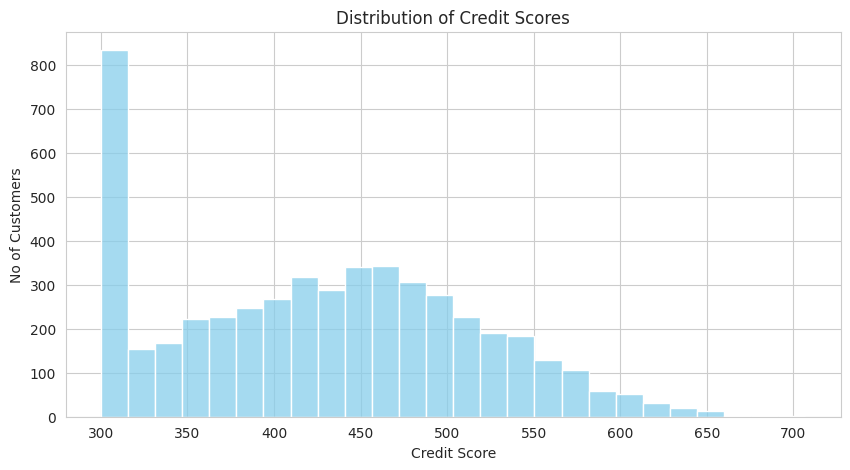

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['Credit_Score'], color = 'skyblue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('No of Customers')
plt.show()

# Insight: Credit Score Distribution
Most scores lie between **400 and 500**, with a healthy bell-curve shape. Very low and very high scores are rare.

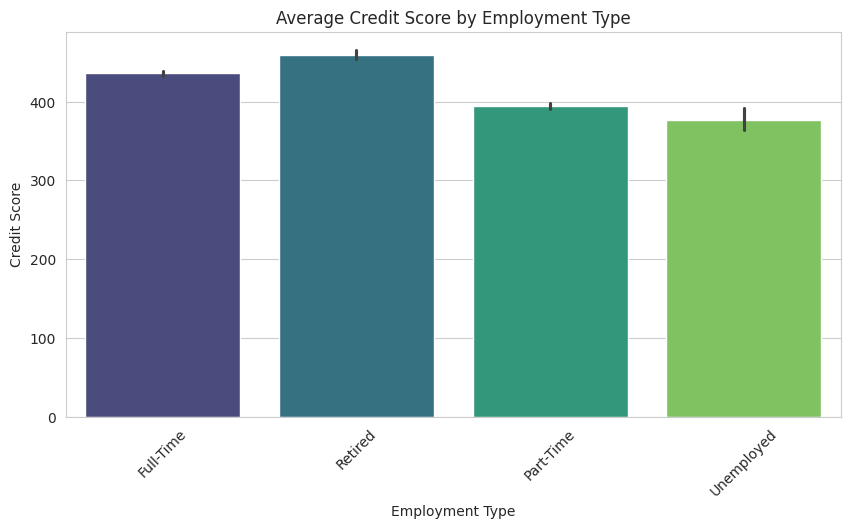

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(df,x='Employment_Type',y='Credit_Score', hue='Employment_Type',palette='viridis')
plt.title('Average Credit Score by Employment Type')
plt.xticks(rotation=45)
plt.xlabel('Employment Type')
plt.ylabel('Credit Score')
plt.show()

# Insight: Employment Type
Retired and Full-Time workers show higher credit scores, while Unemployed and Part-Time individuals typically score lower due to less financial stability.

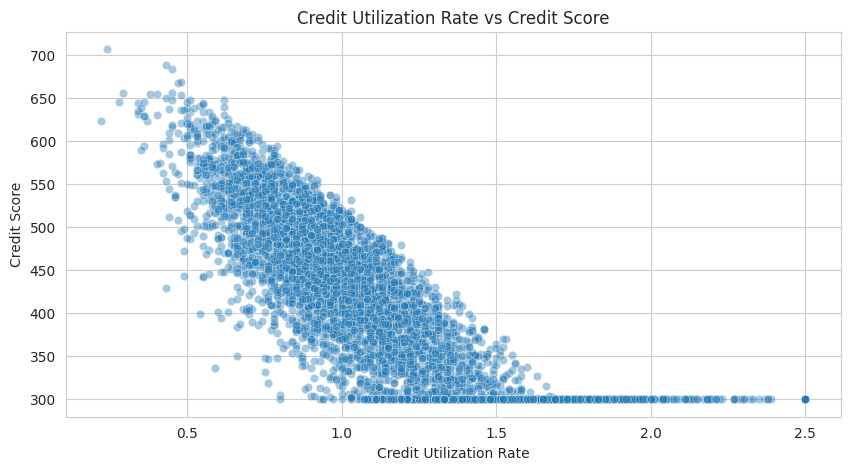

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df,x='Credit_Utilization_Rate',y='Credit_Score',alpha=0.4)
plt.title('Credit Utilization Rate vs Credit Score')
plt.xlabel('Credit Utilization Rate')
plt.ylabel('Credit Score')
plt.show()

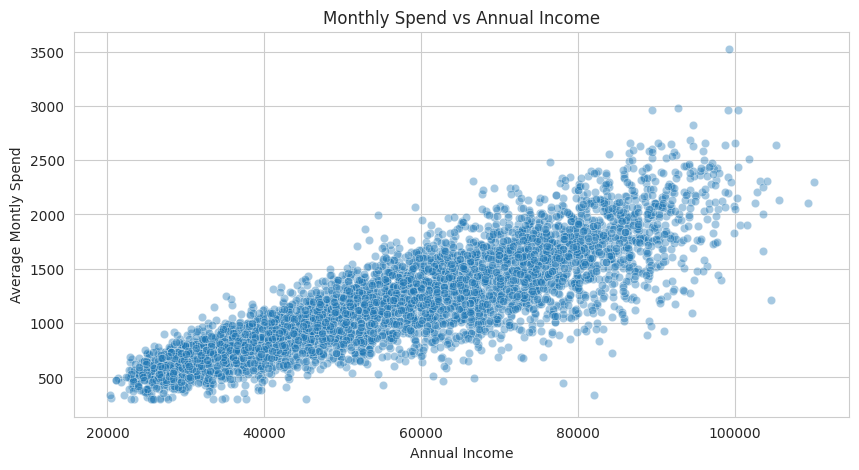

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(df,x='Annual_Income',y='Avg_Monthly_Spend',alpha=0.4)
plt.title('Monthly Spend vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Montly Spend')
plt.show()

# Insight: Income vs Spending
As Income increases, average spend tends to increase, though not linearly. Spending habits vary even among high-income spenders

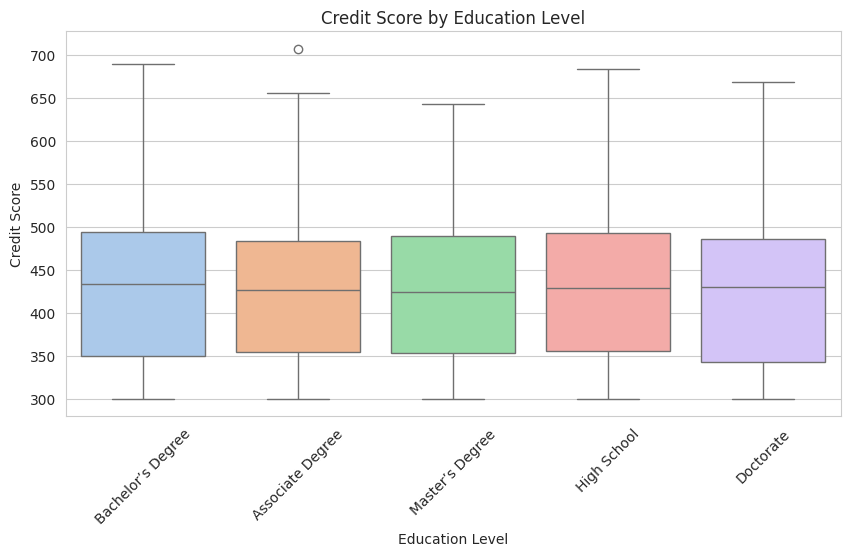

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Education_Level', y='Credit_Score',hue ='Education_Level' , palette= 'pastel')
plt.title("Credit Score by Education Level")
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Credit Score')
plt.show()

# Insight: Education Level
Higher Education levels show slightly better credit scores on average. The variation within each group suggests other factors also play a role

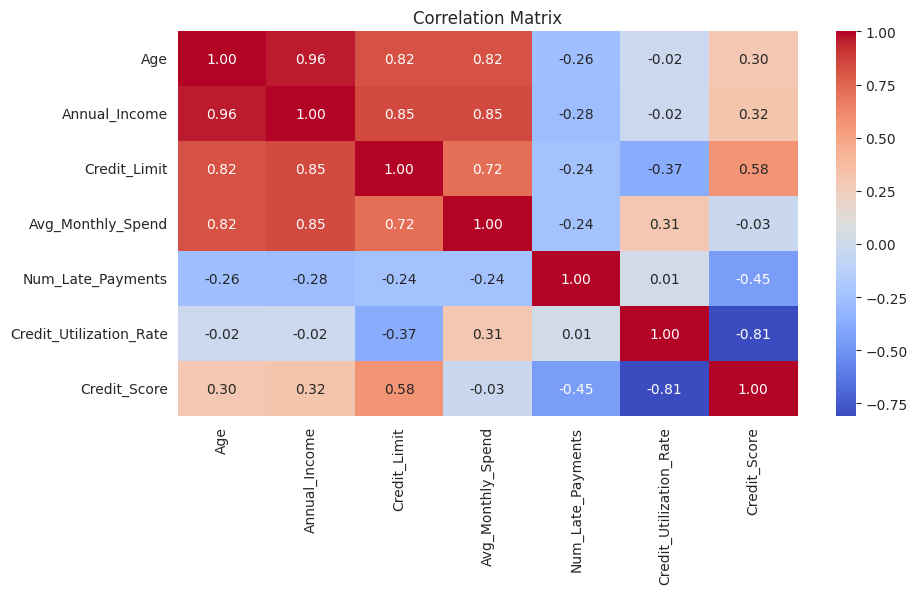

In [32]:
plt.figure(figsize=(10,5))
corr = df[['Age', 'Annual_Income', 'Credit_Limit' , 'Avg_Monthly_Spend',
           'Num_Late_Payments', 'Credit_Utilization_Rate', 'Credit_Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Insight: Correlation Matrix


*   `Credit_Score` has strong negative correlations with `Credit_Utilization_Rate` and `Late_Payments`
*   `Annual_Income` , `Credit_Limit` , and `Spend `are positively correlated



In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,mean_squared_error, r2_score


In [35]:
# Drop unused columns
df_model=df.drop(columns=['Customer_ID','Gender','State','Education_Level'])

In [36]:
# Encode employement type
df_model = pd.get_dummies(df_model, columns=['Employment_Type'],drop_first=True)

In [37]:
df_model.head()

,Age,Annual_Income,Credit_Limit,Avg_Monthly_Spend,Num_Late_Payments,Credit_Utilization_Rate,Credit_Score,Employment_Type_Part-Time,Employment_Type_Retired,Employment_Type_Unemployed
0,59,66596,16202,1512,2,1.12,400,False,False,False
1,72,96799,19004,2109,1,1.33,397,False,True,False
2,49,58504,20415,1133,1,0.67,558,False,False,False
3,35,43591,11057,1280,1,1.39,326,True,False,False
4,63,80477,24745,1883,3,0.91,446,False,False,False


In [38]:
# Define features and Target
x=df_model.drop(columns=['Credit_Score'])
y=df_model['Credit_Score']

In [39]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
# Feature Scaling
scaler_model=StandardScaler()
X_train_scaled=scaler_model.fit_transform(X_train)
X_test_scaled=scaler_model.transform(X_test)

In [41]:
# Train the model
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred = model.predict(X_test_scaled)

In [43]:
# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse= np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 2.90
Root Mean Squared Error: 5.15
Mean Squared Error: 26.51
R-squared: 1.00


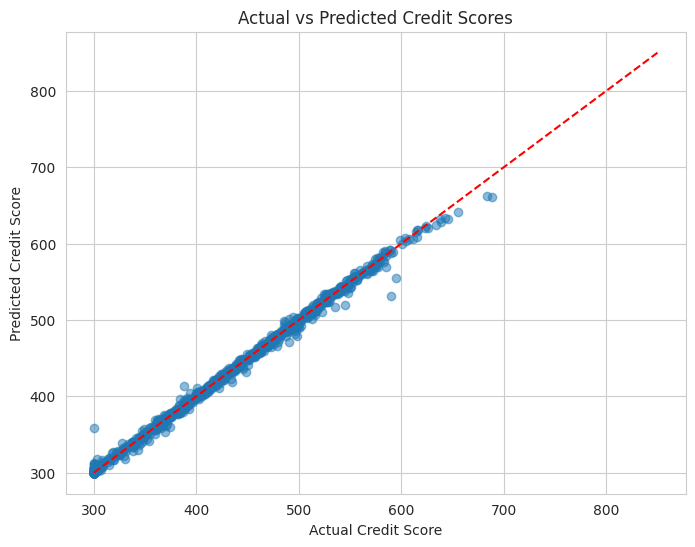

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([300,850],[300,850],color='red', linestyle = '--')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores')
plt.show()

# Actual vs Predicted Insight


*   The scatterplot shows most predictions falling near the diagonal line, indicating good model accuracy.
*   A few outliers may represent unique customer behaviours not fully captured by our features.
*   Overall, the model generalizes well and can estimate creditworthiness with reasonable confidence.

/tmp/ipython-input-3935449197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df,palette='viridis')


Text(0, 0.5, 'Feature')

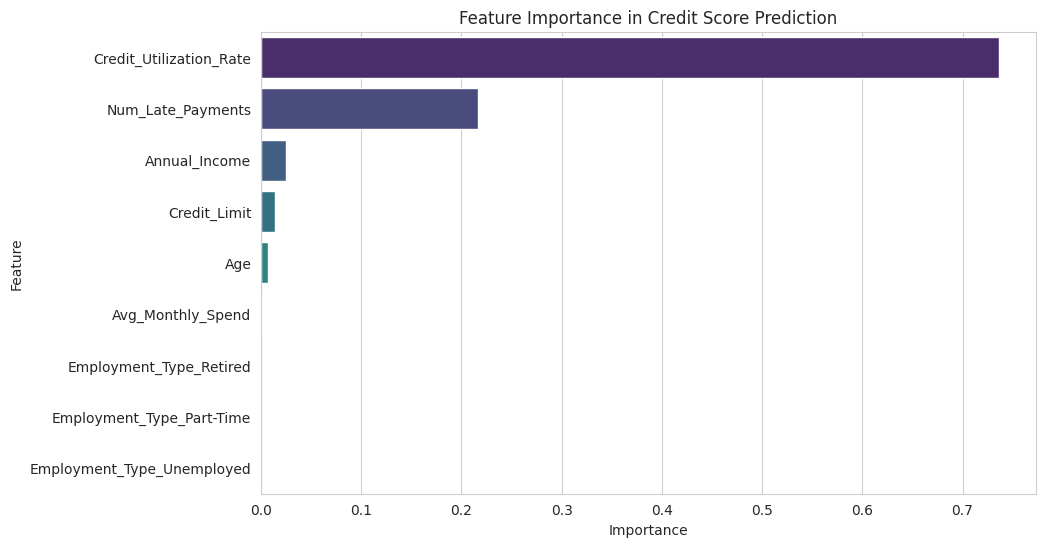

In [45]:
importances = model.feature_importances_
feature_names = x.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df,palette='viridis')
plt.title('Feature Importance in Credit Score Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')

Important Insights:

- Credit Utilization Rate is the most important Feature
- Number of Late Payments is also a strong signal